In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
PATH_CARDIO = './cardio_base.csv'
card_df = pd.read_csv(PATH_CARDIO)
card_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [4]:
card_df.age.max(),card_df.age.min()

(23713, 10798)

In [5]:
card_df.groupby('age').weight.mean().min(),card_df.groupby('age').weight.mean().max()

(11.0, 165.0)

In [6]:
card_df[card_df.weight.eq(11.0)].age

33817    21582
Name: age, dtype: int64

In [7]:
card_df[card_df.weight.eq(165.0)].age

2458     23646
8423     14697
14520    22031
18031    15086
34595    15505
59625    17643
Name: age, dtype: int64

In [8]:
card_df.groupby('weight').age.max()

weight
10.0     18804
11.0     21582
21.0     21855
22.0     20408
23.0     23284
         ...  
178.0    20656
180.0    18975
181.0    19630
183.0    20939
200.0    16765
Name: age, Length: 287, dtype: int64

In [9]:
(6-1)/6

0.8333333333333334

In [10]:
card_df['New_age'] = card_df.age.apply(lambda x: x/365).astype('int')
#card_df[card_df.New_age.eq(50)].cholesterol.mean(),\
card_df[card_df.New_age.gt(50)].cholesterol.mean(), card_df[(card_df.New_age.lt(50))|card_df.New_age.eq(50)].cholesterol.mean(),\
100*(card_df[card_df.New_age.gt(50)].cholesterol.mean() - card_df[card_df.New_age.lt(50)|card_df.New_age.eq(50)].cholesterol.mean())/card_df[card_df.New_age.lt(50)|card_df.New_age.eq(50)].cholesterol.mean()

(1.4313608815426997, 1.248040609137056, 14.688646432138018)

In [11]:
 card_df[card_df.New_age.eq(50)].cholesterol.mean()


1.2804726368159205

In [12]:
card_df.groupby('gender')[['smoke','height']].mean()

,smoke,height
gender,,
1,0.017856,161.355612
2,0.218880,169.947895


In [13]:
(0.218880-0.017856)/0.017856
#(5356-813)/813

11.25806451612903

In [14]:
card_df.height.quantile(0.99)

184.0

In [15]:
card_df.corr(method='spearman')[card_df.corr(method='spearman').lt(1)].describe()
#card_df.corr(method='spearman').describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,New_age
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.001227,0.158806,0.122322,0.096475,0.150113,0.197338,0.177174,0.080219,0.064358,0.159231
std,0.003104,0.331011,0.195220,0.211276,0.111273,0.227168,0.225436,0.098349,0.126253,0.331097
min,-0.003697,-0.082292,-0.035730,-0.083530,-0.001292,0.003258,-0.000238,-0.058940,-0.047471,-0.083530
25%,-0.001292,-0.020176,-0.020176,-0.058940,0.062952,0.028929,0.030534,0.005706,-0.003697,-0.020668
50%,0.002682,0.061559,0.063174,0.019381,0.137908,0.208722,0.156700,0.137908,0.026172,0.062952
75%,0.003258,0.156700,0.172480,0.197632,0.254420,0.220309,0.167401,0.141571,0.071676,0.157768
max,0.005706,0.999052,0.533805,0.533805,0.313569,0.735436,0.735436,0.208722,0.338135,0.999052


In [16]:
# calculate the mean and standard deviation of the age variable
age_mean = card_df['age'].mean()
age_std = card_df['age'].std()

# calculate the upper and lower bounds for two standard deviations from the mean
upper_bound = age_mean + 2 * age_std
lower_bound = age_mean - 2 * age_std

# count the number of people whose age falls within the upper and lower bounds
within_bounds = card_df[(card_df['age'] >= lower_bound) & (card_df['age'] <= upper_bound)].count()['age']

# calculate the percentage of people within two standard deviations from the mean
percentage_within_bounds = within_bounds / len(card_df) * 100

print("Percentage of people within two standard deviations from the mean:", 100-percentage_within_bounds)

Percentage of people within two standard deviations from the mean: 1.7257142857142895


In [17]:
PATH_ALC = './cardio_alco.csv'
alc_df = pd.read_csv(PATH_ALC)
alc_df

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


In [18]:
alc_df[['id','alco']] = alc_df['id;alco'].str.split(';',expand=True)

In [19]:
alc_df['id'] = alc_df.id.astype('int')
alc_df['alco'] = alc_df.alco.astype('int')

In [20]:
alc_df
card_df
card_df = pd.merge(card_df,alc_df[['id','alco']], on='id')

In [21]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56903 entries, 0 to 56902
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  int64  
 2   gender       56903 non-null  int64  
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   New_age      56903 non-null  int32  
 10  alco         56903 non-null  int32  
dtypes: float64(1), int32(2), int64(8)
memory usage: 4.8 MB


In [22]:
card_df.alco.value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [23]:
100*card_df[card_df.New_age.gt(50)|card_df.New_age.eq(50)].alco.sum()/card_df[card_df.New_age.gt(50)|card_df.New_age.eq(50)].shape[0]

4.952675001265375

In [24]:
from scipy.stats import t
from scipy.stats import ttest_ind

# read in your data as a DataFrame

# extract the blood pressure of smokers and non-smokers
bp_smokers = card_df[card_df['smoke'].eq(1)]['ap_hi']
bp_nonsmokers = card_df[card_df['smoke'].eq(0)]['ap_hi']

# perform a two-sample t-test with unequal variance assumption
t_stat, p_val = ttest_ind(bp_smokers, bp_nonsmokers, equal_var=False)

# calculate the degrees of freedom
card_df2 = len(bp_smokers) + len(bp_nonsmokers) - 2

# calculate the critical t-value for a 95% confidence interval
t_crit = t.ppf(0.975, df=card_df2)

# calculate the mean difference and the 95% confidence interval
mean_diff = bp_smokers.mean() - bp_nonsmokers.mean()
se_diff = (bp_smokers.std()**2/len(bp_smokers) + bp_nonsmokers.std()**2/len(bp_nonsmokers))**0.5
ci_lower = mean_diff - t_crit*se_diff
ci_upper = mean_diff + t_crit*se_diff

print("t-statistic:", t_stat)
print("p-value:", p_val)
print("95% confidence interval of the mean difference:", (ci_lower, ci_upper))

t-statistic: -1.017180290410511
p-value: 0.3090720212879393
95% confidence interval of the mean difference: (-2.3255323651498934, 0.7364575053726232)


In [25]:
PATH_COV = './covid_data.csv'
cov_df = pd.read_csv(PATH_COV)
cov_df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [26]:
cov_df.dropna(inplace=True)
# Filter the DataFrame to include only Italy and Germany
italy_germany_data = cov_df[cov_df['location'].isin(['Italy', 'Germany'])]
italy_germany_data.dropna(inplace=True)

# Create a new column for the difference in total confirmed cases
italy_germany_data['cases_diff'] = italy_germany_data.groupby('location')['new_cases'].cumsum().diff()
italy_germany_data[italy_germany_data.new_cases.eq(italy_germany_data.new_cases.max())]

# Filter the DataFrame to include only dates where the difference in total confirmed cases was greater than 10,000
cases_diff_gt_10000 = italy_germany_data[italy_germany_data['cases_diff'] > 10000]

#cases_diff_gt_10000#.dropna(inplace=True)

# Print the earliest date in the filtered DataFrame
print(cases_diff_gt_10000['date'].min())


nan


C:\Users\CarlosSolano.iel\AppData\Local\Temp\ipykernel_3652\296289658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_germany_data.dropna(inplace=True)
C:\Users\CarlosSolano.iel\AppData\Local\Temp\ipykernel_3652\296289658.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_germany_data['cases_diff'] = italy_germany_data.groupby('location')['new_cases'].cumsum().diff()


C:\Users\CarlosSolano.iel\AppData\Local\Temp\ipykernel_3652\3780703761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()


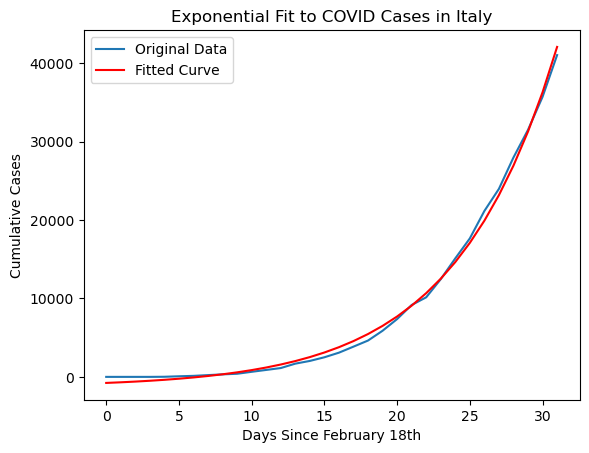

In [27]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


italy_data = cov_df.loc[(cov_df['location'] == 'Italy') & (cov_df['date'] >= '2020-02-18') & (cov_df['date'] <= '2020-03-20')]

# Calculate the cumulative sum of cases for each date
italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()

# Define the exponential function to be fitted
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential function to the cumulative cases data using curve_fit()
x = np.arange(len(italy_data))
y = italy_data['cumulative_cases'].to_numpy()
popt, pcov = curve_fit(exponential_func, x, y)

# Plot the original cumulative cases data and the fitted exponential curve
plt.plot(x, y, label='Original Data')
plt.plot(x, exponential_func(x, *popt), 'r-', label='Fitted Curve')
plt.xlabel('Days Since February 18th')
plt.ylabel('Cumulative Cases')
plt.title('Exponential Fit to COVID Cases in Italy')
plt.legend()

In [28]:

# Read in the COVID cases data
#cov_df = pd.read_csv('covid_cases.csv')

# Group the DataFrame by location and calculate the total number of deaths for each country
total_deaths = cov_df.groupby('location')['new_deaths'].sum()

# Calculate the death rate for each country
populations = cov_df.groupby('location')['population'].max()
death_rates = total_deaths / populations

# Sort the DataFrame by death rate in descending order
sorted_rates = death_rates.sort_values(ascending=False)

# Extract the name of the country in the third row of the sorted DataFrame
third_highest = sorted_rates.index[2]

print(third_highest)


Spain


In [29]:

# Read in the COVID cases data
#cov_df = pd.read_csv('covid_cases.csv')

# Group the DataFrame by location and calculate the total number of deaths for each country
total_deaths = cov_df.groupby('location')['new_deaths'].sum()

# Calculate the death rate for each country (total number of deaths per million inhabitants)
populations = cov_df.groupby('location')['population'].max()
death_rates = (total_deaths / populations) * 1_000_000

# Sort the DataFrame by death rate in descending order
sorted_rates = death_rates.sort_values(ascending=False)

# Extract the name of the country in the third row of the sorted DataFrame
third_highest = sorted_rates.index[2]

print(third_highest)


Spain


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [31]:

# Read in the COVID cases data

# Calculate the death rate for each country (total number of deaths per million inhabitants)
total_deaths = cov_df.groupby('location')['new_deaths'].sum()
populations = cov_df.groupby('location')['population'].max()
death_rates = (total_deaths / populations) * 1_000_000

# Calculate the percentage of the population aged 65 or older for each country
elderly_population = cov_df.groupby('location')['aged_65_older_percent'].mean()

# Filter the DataFrame to only include rows where the population aged 65 or older is greater than 20% and the death rate is over 50 per million
high_death_rates = (death_rates > 50)
high_elderly_pop = (elderly_population > 20)
selected_countries = high_death_rates & high_elderly_pop
selected_country_names = selected_countries[selected_countries].index

# Create a new DataFrame that includes only the rows corresponding to these countries
selected_data = cov_df[cov_df['location'].isin(selected_country_names)]

# Calculate the precision, recall, and F1 score for this subset of data
true_positives = len(selected_data[selected_data['new_deaths'] > 0])
false_positives = len(selected_data) - true_positives
false_negatives = 0
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1score = f1_score(selected_data['new_deaths'] > 0, [1] * len(selected_data))

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)


Precision: 0.5871404399323181
Recall: 1.0
F1 Score: 0.7398720682302772


In [32]:

# load the table
df = cov_df.copy()
# proportion of countries with GDP>10000
p_gdp = (df['gdp_per_capita'] > 10000).mean()

# proportion of countries with at least 5 hospitals per 1000 inhabitants
p_hospitals = (df['hospital_beds_per_thousand'] >= 5).mean()

# proportion of countries with GDP>10000 and at least 5 hospitals per 1000 inhabitants
p_hospitals_gdp = ((df['gdp_per_capita'] > 10000) & (df['hospital_beds_per_thousand'] >= 5)).mean()

# P(GDP>10000 | hospitals>=5)
p_gdp_hospitals = p_hospitals_gdp * p_gdp / p_hospitals

print(p_gdp_hospitals)


0.6296033023326808


In [33]:
table = np.array([[1,3],[2,4]])
print(table.max(axis=1))

[3 4]


In [34]:
{x:x*x for x in range(1,10)}

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

<AxesSubplot:xlabel='Date'>

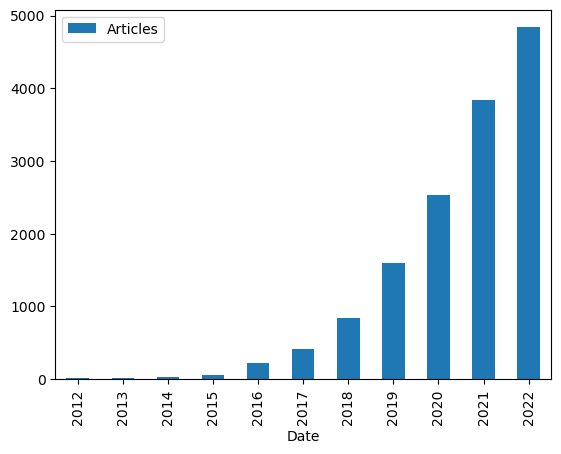

In [35]:
scopus = pd.DataFrame({'Date':[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                          'Articles':[22,23,34,60,222,417,839,1604,2531,3843,4839]})
scopus.set_index('Date').plot(kind='bar')
#plt.yscale('log')
#plt.xscale('log')

<AxesSubplot:xlabel='Date', ylabel='Articles'>

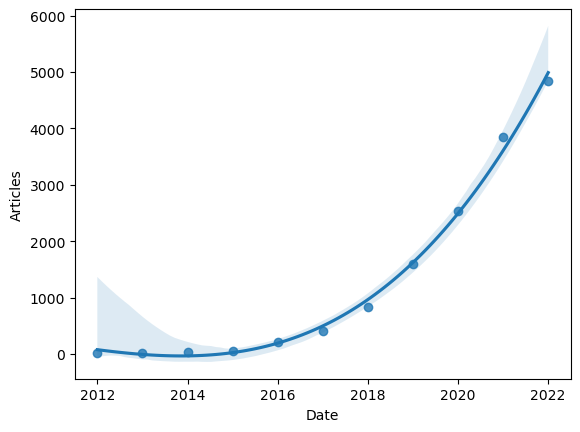

In [36]:
sns.regplot(data=scopus, x='Date', y='Articles', order=3)
#plt.yscale('log')
#plt.xscale('log')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       3             2
4.372 x - 2.637e+04 x + 5.303e+07 x - 3.554e+10
a = -4.071078888623393e-05
b = 1.4902601554097892
c = -7942.427262296627
articles prevision to 2023 =  6663.90909576416


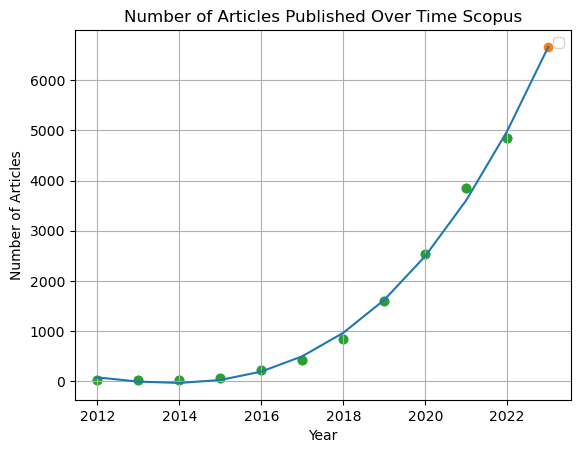

In [37]:
# Define the exponential function to fit
def exp_func(x, a, b, c, d, e):
    #return a * np.exp(b * np.exp(c*x))
    #return a * np.exp(b * x) + c
    return a * np.power(x, 4) + b * np.power(x, 3) + c * np.power(x, 2) + d * np.power(x, 1) + e

    
# Extract the predictor and response variables from the data
x = scopus['Date'].values
y = scopus['Articles'].values

# Fit the exponential function to the data using curve_fit
popt, pcov = curve_fit(exp_func, x, y, maxfev=10000)
model = np.poly1d(np.polyfit(x, y, 3))
#polyline = np.linspace(1, 60, 50)
polyline = x
polyline = np.append(polyline, 2023)
plt.scatter(x, y)
plt.scatter(2023, model(2023))
plt.plot(polyline, model(polyline))
plt.grid()
print(model)
# Print the estimated parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('articles prevision to 2023 = ', model(2023))
#a = 0.03584837129784728
#b = 0.3257409310637928

#a = 513.5011778886724
#b = 0.14309667769722073

# Plot the data points and the fitted exponential curve
plt.scatter(x, y)
#plt.plot(x, exp_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Published Over Time Scopus')
plt.legend()
plt.show()



In [38]:
#!pip install lmfit

Parameters([('a', <Parameter 'a', value=0.10000000000000009, bounds=[0:inf]>), ('b', <Parameter 'b', value=0.19999999999999996, bounds=[0:inf]>), ('c', <Parameter 'c', value=0.0, bounds=[0:inf]>)])


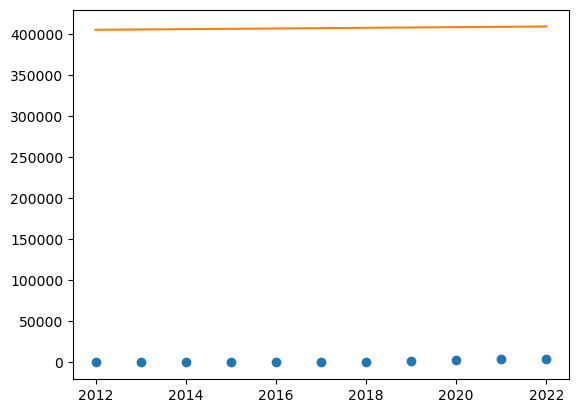

In [39]:
import lmfit

# Define the exponential model
def exp_func(x, a, b, c):
    #return a * np.exp(b * x) + c
    return a * np.power(x, 2) + c


# Create an lmfit Parameters object with initial guesses for the parameters
params = lmfit.Parameters()
params.add('a', value=0.1, min=0)
params.add('b', value=0.2, min=0)
params.add('c', value=0, min=0)

# Create an lmfit Model object with the exponential function and the parameters
model = lmfit.Model(exp_func, independent_vars=['x'])

# Fit the model to the data
result = model.fit(y, params, x=x)

# Print the fitted parameter values
print(result.params)

# Plot the data and the fit
plt.plot(x, y, 'o')
plt.plot(x, result.best_fit, '-')
plt.show()

In [72]:
class Figura:
    def __init__(self, tam, form):
        self.tamaño = tam
        self.forma = form

    def print2(self, texto=True):
        if texto == True:
            print(f'El atributo tamaño es {self.tamaño} y el atributo forma es {self.forma}')
        else:
            print(f'Tamaño: {self.tamaño}, Forma: {self.forma}')

In [73]:
mi_prueba = Figura('Grande','Redondo')
mi_prueba.print2()
mi_prueba.print2(texto=False)

El atributo tamaño es Grande y el atributo forma es Redondo
Tamaño: Grande, Forma: Redondo


In [87]:
class Triangulo(Figura):
    nombre = 'Triángulo'
    def __init__(self, L1, L2, L3, tam, form):
        super().__init__(tam, form)
        self.lado_a = L1
        self.lado_b = L2
        self.lado_c = L3
    
    def calcula_area(self):
        self.perimetro = self.lado_a + self.lado_b + self.lado_c
        self.area = pow(0.5*self.perimetro*(0.5*self.perimetro - self.lado_a)
                        *(0.5*self.perimetro - self.lado_b)*(0.5*self.perimetro - self.lado_c), 0.5)
        if type(self.area) == complex:
            return print('Los lados no corresponden a un triángulo')
        return self.area

In [93]:
mi_triangulo = Triangulo(1, 4, 5, 'Pequeño', 'Triangular')
mi_triangulo.calcula_area()
mi_triangulo.perimetro
mi_triangulo.print2(texto=False)

Tamaño: Pequeño, Forma: Triangular
